### Data analysis for DIA-NN's result on Mixture dataset

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

plt.style.use('default')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'Arial'

#### Check analysis time

In [47]:
report_dir = Path('../../reports/Mixture')

with open(report_dir/'diann_220'/'report.log.txt') as f:
    lines = f.readlines()
    time_str = lines[-2].split(' ')[0][1:-1]
    total_minutes = int(time_str.split(':')[0]) + int(
        time_str.split(':')[-1]) / 60
    n = int(lines[-20].split(' ')[-2])
    t_mean = total_minutes / n
print(f'#runs: {n}, Minutes/Run: {t_mean:.2f}')

#runs: 6, Minutes/Run: 3.94


#### Check the report.parquet
1. #ids
2. miss rate

In [48]:
df_raw = pd.read_parquet(report_dir/'diann_220'/'report.parquet', engine='fastparquet')
n_pgs = df_raw[df_raw['Global.PG.Q.Value'] < 0.01]['Protein.Group'].nunique()
n_prs = df_raw[df_raw['Global.Q.Value'] < 0.01]['Precursor.Id'].nunique()
print(f'Global n_prs: {n_prs}, Global n_pgs: {n_pgs}')

df_raw['species'] = df_raw['Protein.Names'].apply(
        lambda row: ';'.join(
            set([part.split('_')[1] for part in row.split(';')]))
    )
df_raw = df_raw[df_raw['species'].str.count(';') == 0]
assert df_raw['species'].isin(['HUMAN', 'ECOLI']).all()

Global n_prs: 71399, Global n_pgs: 6372


#### Precursor level

In [49]:
# matrix
df_pr = df_raw[(df_raw['Global.Q.Value'] < 0.01) &
               (df_raw['Q.Value'] < 0.01)]
df_pr = df_pr[['species', 'Precursor.Id', 'Run', 'Precursor.Quantity']]
df_pr = df_pr.drop_duplicates().reset_index(drop=True)
df_pr = df_pr.pivot(index=['species', 'Precursor.Id'],
                columns='Run',
                values='Precursor.Quantity')
miss = df_pr.isna().sum().sum() / df_pr.shape[0] / df_pr.shape[1]
df_pr = df_pr.fillna(0)

df_pr.columns.name = None
df_pr.index.name = None
df_pr = df_pr.reset_index()[::-1]

print(f'Global FDR filtering, shape: {df_pr.shape}, miss: {miss:.2f}')
print(df_pr.columns)
df_pr.copy()

Global FDR filtering, shape: (71399, 8), miss: 0.08
Index(['species', 'Precursor.Id',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423'],
      dtype='object')


,species,Precursor.Id,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423
71398,HUMAN,YYYVPADFVEYEK2,7.164376e+03,3.229135e+03,9.758486e+03,5.150044e+03,7.006451e+03,0.000000e+00
71397,HUMAN,YYYIPQYK2,0.000000e+00,1.861482e+04,2.873861e+04,0.000000e+00,1.762859e+04,1.989601e+04
71396,HUMAN,YYYDGDMIC(UniMod:4)K2,0.000000e+00,5.495619e+03,8.083779e+03,0.000000e+00,6.392384e+03,4.591145e+03
71395,HUMAN,YYYAVVDC(UniMod:4)DSPETASK2,8.195022e+03,6.546772e+03,7.427412e+03,3.888527e+03,5.908702e+03,6.835905e+03
71394,HUMAN,YYVTIIDAPGHR3,1.420178e+06,1.056895e+06,1.445430e+06,1.245544e+06,1.303605e+06,1.165145e+06
...,...,...,...,...,...,...,...,...
4,ECOLI,AAAFEGELIPASQIDR2,2.368171e+05,1.949849e+05,2.376824e+05,3.359068e+05,3.521017e+05,3.398616e+05
3,ECOLI,AAAESSIQVK2,3.332202e+04,3.078327e+04,3.984457e+04,4.127802e+04,0.000000e+00,2.949443e+04
2,ECOLI,AAAEGEMK2,1.692727e+04,2.287088e+04,1.359941e+04,2.940102e+04,2.488829e+04,1.866899e+04
1,ECOLI,AAADVQLR2,3.606118e+04,2.479447e+04,3.238900e+04,4.723537e+04,4.053162e+04,7.863389e+04


In [50]:
# merge replicates
df_pr['quant_pr_1'] = df_pr.iloc[:, 5:8].mean(axis=1) + 1
df_pr['quant_pr_2'] = df_pr.iloc[:, 2:5].mean(axis=1) + 1
df_pr['ratio'] = np.log2(df_pr['quant_pr_1'] / df_pr['quant_pr_2'])
df_pr['x'] = np.log2(df_pr['quant_pr_2'])
truth_ratio = 500 / 333

n_human = sum(df_pr['species'] == 'HUMAN')
n_ecoli = sum(df_pr['species'] == 'ECOLI')
median_human = df_pr.loc[df_pr['species'] == 'HUMAN', 'ratio'].median()
median_ecoli = df_pr.loc[df_pr['species'] == 'ECOLI', 'ratio'].median()
print('Human on Precursor Level:')
print(f'prs_n: {n_human}, prs_median: {median_human:.3f}')
print('ECOLI on Precursor Level:')
print(f'prs_n: {n_ecoli}, prs_median: {median_ecoli:.3f}')
print(f'Expected ratio: {np.log2(truth_ratio):.3f}')

Human on Precursor Level:
prs_n: 60902, prs_median: -0.137
ECOLI on Precursor Level:
prs_n: 10497, prs_median: 0.658
Expected ratio: 0.586


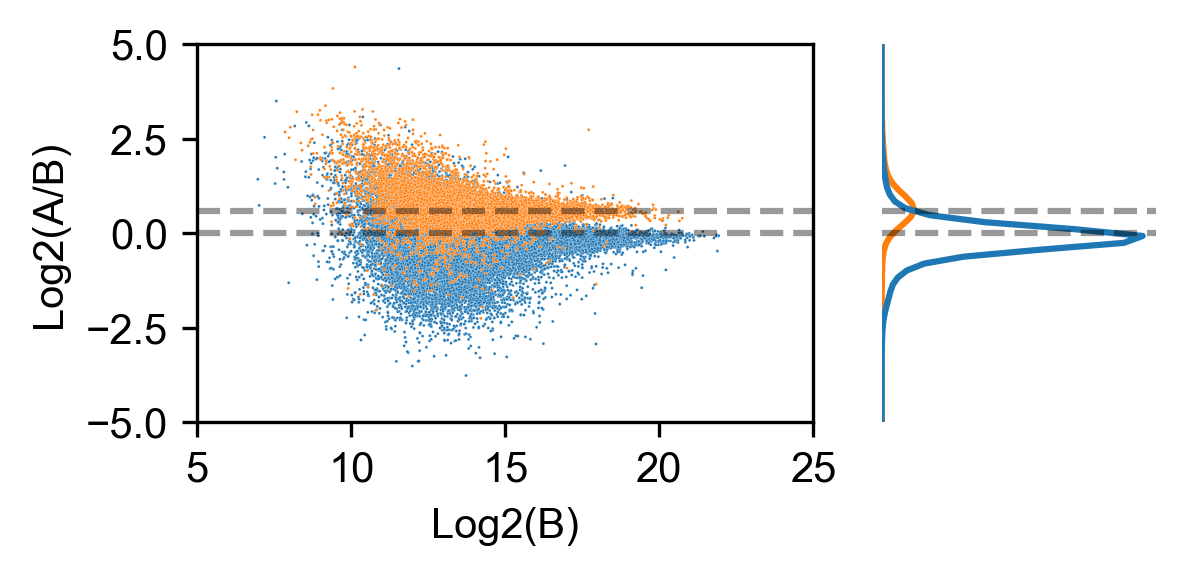

In [51]:
# plot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10 / 2.54, 5 / 2.54))
grid = plt.GridSpec(1, 3)

# scatter
color = u'#da5f02'
ax = plt.subplot(grid[0, 0:2])
sns.scatterplot(data=df_pr,
                x='x',
                y='ratio',
                hue='species',
                s=0.5,
                color=color,
                ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-5, 5)
ax.set_xlim(5, 25)
ax.set_xlabel('Log2(B)')
ax.set_ylabel('Log2(A/B)')
ax.get_legend().remove()

# box
ax = plt.subplot(grid[0, 2])
sns.kdeplot(data=df_pr,
            y='ratio',
            hue='species',
            legend=False,
            ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-5, 5)
ax.set_yticklabels([])
ax.axis('off')
ax.set_frame_on(False)

plt.tight_layout()
plt.show()

#### Protein Group Level

In [52]:
# matrix
df_pg = df_raw[(df_raw['Global.PG.Q.Value'] < 0.01) &
             (df_raw['PG.Q.Value'] < 0.01)]
df_pg = df_pg[['species', 'Protein.Group', 'Run', 'PG.MaxLFQ']]
df_pg = df_pg.drop_duplicates().reset_index(drop=True)
df_pg = df_pg.pivot(index=['species', 'Protein.Group'],
                columns='Run',
                values='PG.MaxLFQ')
miss = df_pg.isna().sum().sum() / df_pg.shape[0] / df_pg.shape[1]
df_pg = df_pg.fillna(0.)

df_pg.columns.name = None
df_pg.index.name = None
df_pg = df_pg.reset_index()[::-1]

print(f'Global FDR filtering, shape: {df_pg.shape}, miss: {miss:.2f}')
print(df_pg.columns)
df_pg.copy()

Global FDR filtering, shape: (6372, 8), miss: 0.06
Index(['species', 'Protein.Group',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423'],
      dtype='object')


,species,Protein.Group,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423
6371,HUMAN,Q9Y6Y8,20817.466797,16853.781250,23126.330078,19711.148438,20462.363281,17985.609375
6370,HUMAN,Q9Y6Y0,12108.899414,9540.660156,15442.371094,13387.269531,12410.629883,9180.751953
6369,HUMAN,Q9Y6X9,14874.949219,10503.243164,12862.449219,11249.434570,10639.139648,10410.609375
6368,HUMAN,Q9Y6X3,11504.489258,7209.847168,10846.662109,10308.042969,10515.979492,8361.113281
6367,HUMAN,Q9Y6W5,26848.972656,24828.652344,28642.369141,25923.357422,25900.789062,23108.753906
...,...,...,...,...,...,...,...,...
4,ECOLI,P00448,49126.726562,45705.320312,47714.285156,77764.046875,76325.781250,61464.054688
3,ECOLI,P00393,19900.158203,14708.455078,17915.419922,25567.505859,26046.320312,22702.347656
2,ECOLI,P00370,5216.614258,3804.229736,5056.100586,9716.858398,10899.390625,8840.128906
1,ECOLI,P00363,33735.070312,27370.750000,29999.101562,45273.261719,48116.589844,40889.800781


In [53]:
# merge replicates
df_pg['quant_pg_1'] = df_pg.iloc[:, 5:8].mean(axis=1) + 1
df_pg['quant_pg_2'] = df_pg.iloc[:, 2:5].mean(axis=1) + 1
df_pg['ratio'] = np.log2(df_pg['quant_pg_1'] / df_pg['quant_pg_2'])
df_pg['x'] = np.log2(df_pg['quant_pg_2'])
truth_ratio = 500 / 333

n_human = sum(df_pg['species'] == 'HUMAN')
n_ecoli = sum(df_pg['species'] != 'HUMAN')
median_human = df_pg.loc[df_pg['species'] == 'HUMAN', 'ratio'].median()
median_ecoli = df_pg.loc[df_pg['species'] != 'HUMAN', 'ratio'].median()
print('Human on Protein Group Level:')
print(f'pgs_n: {n_human}, pgs_median: {median_human:.3f}')
print('ECOLI on Protein Group Level:')
print(f'pgs_n: {n_ecoli}, pgs_median: {median_ecoli:.3f}')
print(f'Expected ratio: {np.log2(truth_ratio):.3f}')

Human on Protein Group Level:
pgs_n: 5149, pgs_median: -0.112
ECOLI on Protein Group Level:
pgs_n: 1223, pgs_median: 0.631
Expected ratio: 0.586


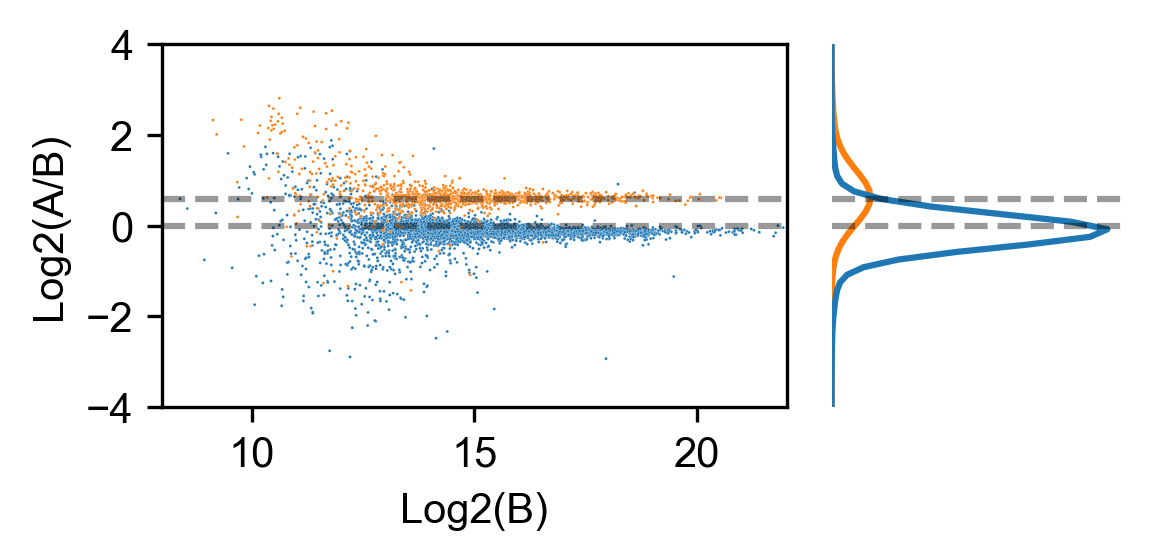

In [54]:
# plot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10 / 2.54, 5 / 2.54))
grid = plt.GridSpec(1, 3)

# scatter
color = u'#da5f02'
ax = plt.subplot(grid[0, 0:2])
sns.scatterplot(data=df_pg,
                x='x',
                y='ratio',
                hue='species',
                hue_order=['HUMAN', 'ECOLI'],
                s=0.5,
                color=color,
                ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-4, 4)
ax.set_xlim(8, 22)
ax.set_xlabel('Log2(B)')
ax.set_ylabel('Log2(A/B)')
ax.get_legend().remove()

# box
ax = plt.subplot(grid[0, 2])
sns.kdeplot(data=df_pg,
            y='ratio',
            hue='species',
            legend=False,
            ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-4, 4)
ax.set_yticklabels([])
ax.axis('off')
ax.set_frame_on(False)

plt.tight_layout()
plt.show()